# EDA of Unicorn Companies

In this activity, I am a member of an analytics team that provides insights to an investing firm.

To help them decide which companies to invest in next, the firm wants insights into unicorn companies (companies that are valued at over one billion dollars). 

The data for this task provides information on over 1,000 unicorn companies, including their **industry**, **country**, **year founded**, and **select investors**. 

I will use this information to gain insights into how and when companies reach this prestigious milestone and to make recommendations for next steps to the investing firm.

In [1]:
# import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Load the dataset into pandas dataframe and save in a variable:
companies = pd.read_csv('Unicorn_Companies.csv')

In [3]:
# Display the first 10 rows of the data
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


* The `Data Joined` column represent when the company became a unicorn, reaching a 1billion dollar in valuation.
* The `select Investors` column represent top investors in the company.


In [5]:
# How large is the dataset:
companies.size

10740

* The size of the dataset is `10740`. This means that there are 10740 values in total across the whole dataset

In [6]:
# Shape of the dataset
companies.shape

(1074, 10)

There are 1074 rows and 10 columns. That is, there are 1074 companies as at March, 2022 and 10 aspects of each company.

In [7]:
# Get basic information about the dataset
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


`date Joined` column is represented as an object 

`Year Founded` is represented as an integer 

In [8]:
# get descriptive statistics
companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


* The minimum value in the Year Founded column is 1919. This means that this dataset does not contain data on unicorn companies founded before 1919.
* The maximum value in the Year Founded column is 2021. This means that this dataset does not include data on unicorn companies founded after 2021.

**Convert Date_Joined column to `datetime`**

In [9]:
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

# confirm the update
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


C:\Users\obiko\AppData\Local\Temp\ipykernel_17912\3110781495.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])


**Create a `Year_Joined column**

We will need to compare the `year joined` with the `year founded`. 

The Date Joined column does not just have year, it has the year, month, and date. 

Let's Extract the year component from the Date Joined column and add those year components into a new column to keep track of each company's year joined.

In [13]:
companies['Year_Joined'] = companies['Date Joined'].dt.year

# confirm the update
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


# Result and Evaluation

### Take a sample of the data

In [15]:
# Take a sample of 50 companies and assign random_state to make it reproducible
companies_sample = companies.sample(n=50, random_state=42)

#Let's have a look at the sample
companies_sample.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017


## Let's Visualize...

In [17]:
# Prepare the sample data for plotting:

# Create a new years_till_unicorn column
companies_sample['Years_till_Unicorn'] = companies_sample['Year_Joined'] - companies_sample['Year Founded']

In [19]:
# Group the data by Industry, and get the max value for Years_till_Unicorn:
Grouped = (companies_sample[['Industry', 'Years_till_Unicorn']]
                        .groupby('Industry')
                        .max()
                        .sort_values(by= 'Years_till_Unicorn')
)
Grouped

,Years_till_Unicorn
Industry,
Consumer & retail,1
Auto & transportation,2
Artificial intelligence,5
Data management & analytics,8
Mobile & telecommunications,9
"Supply chain, logistics, & delivery",12
Internet software & services,13
Other,15
E-commerce & direct-to-consumer,18


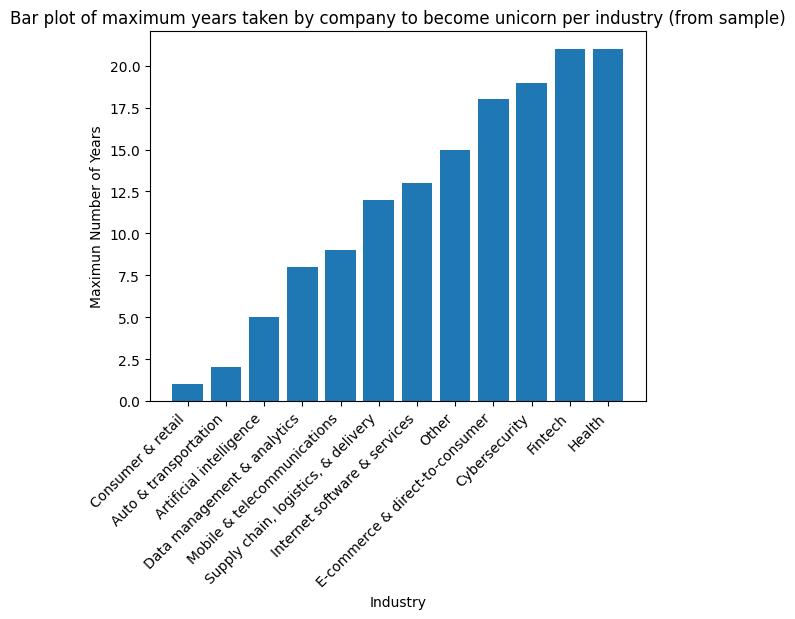

In [25]:
# Create a bar chart

plt.bar(x=Grouped.index, height=Grouped['Years_till_Unicorn'])

# Set title:
plt.title('Bar plot of maximum years taken by company to become unicorn per industry (from sample)')

# Set x-axis label:
plt.xlabel('Industry')

# Set y-axis label:
plt.ylabel('Maximun Number of Years')

# rotate the x-axis label 45 degrees:
plt.xticks(rotation= 45, horizontalalignment= 'right')

plt.show()

This bar plot shows that for this sample of unicorn companies, the largest value for maximum time taken to become a unicorn occurred in the **Heath** and **Fintech** industries, while the smallest value occurred in the **Consumer & Retail** industry.

### Visualize the maximum unicorn company valuation per industry

In [28]:
# Represent the company valuation column as numeric:

# Create a new column:
companies_sample['Valuation Billions'] = companies_sample['Valuation']

# Remove '$' from the each value
companies_sample['Valuation Billions'] = companies_sample['Valuation Billions'].str.replace('$', '')

# remove 'B' from each value
companies_sample['Valuation Billions'] = companies_sample['Valuation Billions'].str.replace('B', '')

# convert to int
companies_sample['Valuation Billions'] = companies_sample['Valuation Billions'].astype('int')

# confirm the modification
companies_sample.info()


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 542 to 342
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Company             50 non-null     object        
 1   Valuation           50 non-null     object        
 2   Date Joined         50 non-null     datetime64[ns]
 3   Industry            50 non-null     object        
 4   City                50 non-null     object        
 5   Country/Region      50 non-null     object        
 6   Continent           50 non-null     object        
 7   Year Founded        50 non-null     int64         
 8   Funding             50 non-null     object        
 9   Select Investors    50 non-null     object        
 10  Year_Joined         50 non-null     int32         
 11  Years_till_Unicorn  50 non-null     int64         
 12  Valuation Billions  50 non-null     int32         
dtypes: datetime64[ns](1), int32(2), int64(2), object(8)
me

In [29]:
companies_sample.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year_Joined,Years_till_Unicorn,Valuation Billions
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021,5,2
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018,8,2
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021,7,3
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021,9,2
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,5,3


In [35]:
# Prepare sample data for the modelling:

Grouped = (companies_sample[['Valuation Billions', 'Industry']]
                            .groupby('Industry')
                            .max()
                            .sort_values(by= 'Valuation Billions')
                            )
Grouped# Create a bar chart

plt.bar(x=Grouped.index, height=Grouped['Years_till_Unicorn'])

# Set title:
plt.title('Bar plot of maximum years taken by company to become unicorn per industry (from sample)')

# Set x-axis label:
plt.xlabel('Industry')

# Set y-axis label:
plt.ylabel('Maximun Number of Years')

# rotate the x-axis label 45 degrees:
plt.xticks(rotation= 45, horizontalalignment= 'right')

plt.show()

,Valuation Billions
Industry,
Auto & transportation,1
Consumer & retail,1
Other,2
"Supply chain, logistics, & delivery",2
Cybersecurity,3
Health,3
Data management & analytics,4
E-commerce & direct-to-consumer,4
Internet software & services,5


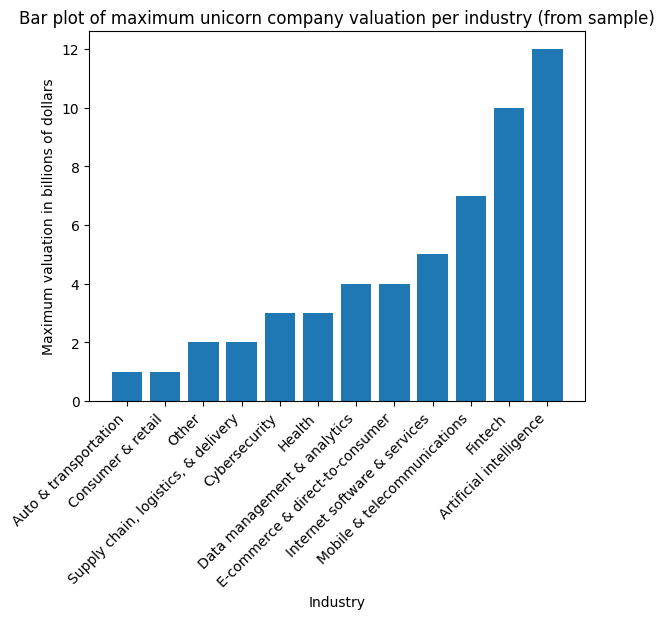

In [36]:
# Create a bar chart

plt.bar(x=Grouped.index, height=Grouped['Valuation Billions'])

# Set title:
plt.title('Bar plot of maximum unicorn company valuation per industry (from sample)')

# Set x-axis label:
plt.xlabel('Industry')

# Set y-axis label:
plt.ylabel('Maximum valuation in billions of dollars')

# rotate the x-axis label 45 degrees:
plt.xticks(rotation= 45, horizontalalignment= 'right')

plt.show()

### What can we observe from this bar plot?

This bar plot shows that for this sample of unicorn companies, the highest maximum valuation occurred in the **Artificial Intelligence** industry, while the lowest maximum valuation occurred in the **Auto & transportation**, and **Consumer & retail** industries.

### Findings to share with stakeholders:

* There are 1074 unicorn companies represented in this dataset.
* Some companies took longer to reach unicorn status but have accrued high valuation as of March 2022. 
* Companies could take longer to achieve unicorn status for a number of reasons, including requiring more funding or taking longer to develop a business model.

### Recommendations based on above findings:
It may be helpful to focus more on industry specifics. Next steps to consider:
* Identify the main industries that the investing firm is interested in investing in.
* Select a subset of this data that includes only companies in those industries.
* Analyze that subset more closely. Determine which companies have higher valuation but do not have as many investors currently. They may be good candidates to consider investing in.